# Assignment 2: Image Enhancement
Tổng quan: Ở bài tập này, chúng ta sẽ thực hành lập trình một số hàm xử lí ảnh cơ bản

In [1]:
from IPython.display import Image

import matplotlib.pyplot as plt
import cv2
import numpy as np

## I. Histograms, Histogram equalization
Biểu đồ Histogram của ảnh là một dạng biểu đồ biểu diễn sự phân bố của  số lượng điểm ảnh tương ứng với mức độ sáng tối của bức ảnh.
- Trong đó, trục dọc biểu diễn số lượng điểm ảnh, các đỉnh càng cao thì càng có nhiều điểm ảnh ở khu vực đó và độ chi tiết càng nhiều. 
- Trục ngang tính từ trái qua phải với mốc giá trị từ 0 đến 255 biểu diễn độ sáng của mỗi khu vực ảnh. Gốc giá trị 0 được coi là tối nhất tựa như màu đen tuyền trong khi càng dịch sang phải giá trị này càng tăng, ngọn sáng nhất của ánh sáng ở giá trị 255.

Để tính được Histogram của một ảnh, ta có thể dùng một trong các hàm sau:
- cv2.
-
- () - https://docs.opencv.org/4.5.2/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d
- plt.hist() - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html


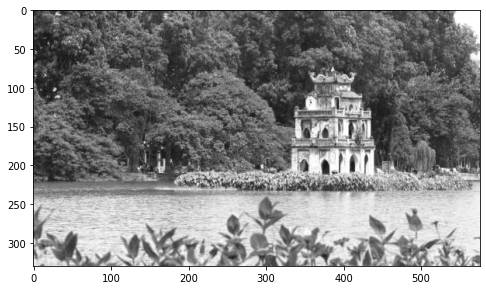

In [2]:
img = cv2.imread('images/HoGuom.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')
plt.show()

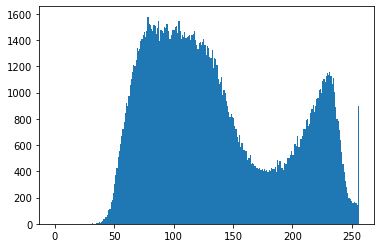

In [5]:
plt.hist(img.ravel(),256,[0,256]);
plt.show()

Dựa vào Histogram có thể  biết được bức ảnh là tối (dark) hay sáng (bright).

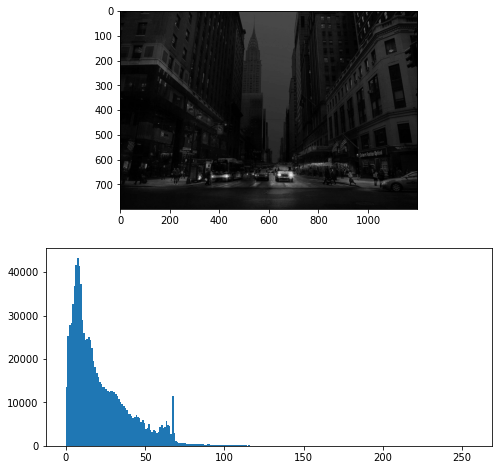

In [6]:
img = cv2.imread('images/dark.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(8,8))
plt.subplot(211)
plt.imshow(img, cmap='gray')

plt.subplot(212)
plt.hist(img.ravel(),256,[0,256])
plt.show()

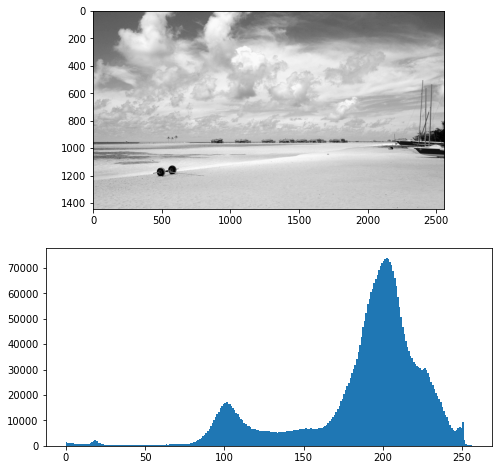

In [7]:
img = cv2.imread('images/bright.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(8,8))
plt.subplot(211)
plt.imshow(img, cmap='gray')

plt.subplot(212)
plt.hist(img.ravel(),256,[0,256])
plt.show()

Đối với ảnh màu, ta có thể xem Histogram của từng kênh màu

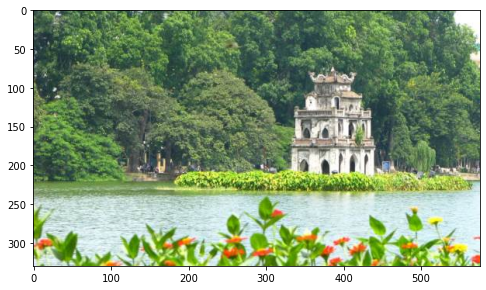

In [8]:
img = cv2.imread('images/HoGuom.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.show()

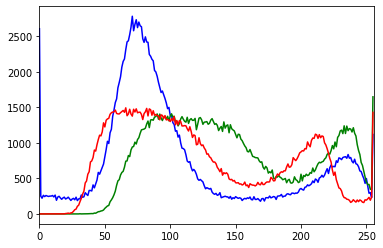

In [10]:
img = cv2.imread('images/HoGuom.jpg', cv2.IMREAD_COLOR)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

### Histogram Equalization

Thư viện OpenCV cung cấp hàm để Equalize Histogram:
- cv2.equalizeHist() - https://docs.opencv.org/4.5.2/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e

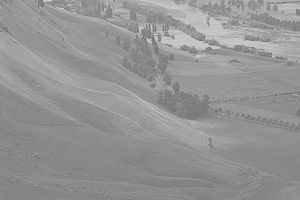

In [11]:
Image('images/unequalized.jpg')

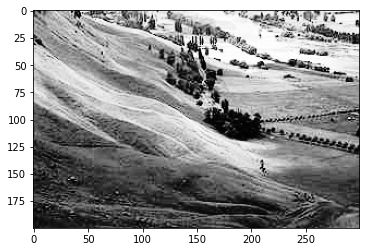

In [12]:
img = cv2.imread('images/unequalized.jpg', cv2.IMREAD_GRAYSCALE)
equ = cv2.equalizeHist(img)
plt.imshow(equ, cmap='gray')
plt.show()

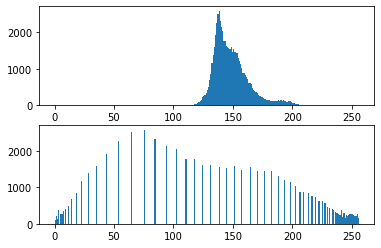

In [13]:
plt.subplot(211)
plt.hist(img.ravel(),256,[0,256])

plt.subplot(212)
plt.hist(equ.ravel(),256,[0,256])
plt.show()

Tuy nhiên không phải lúc nào Equalize Histogram toàn bộ ảnh cũng giúp đạt kết quả mong muốn

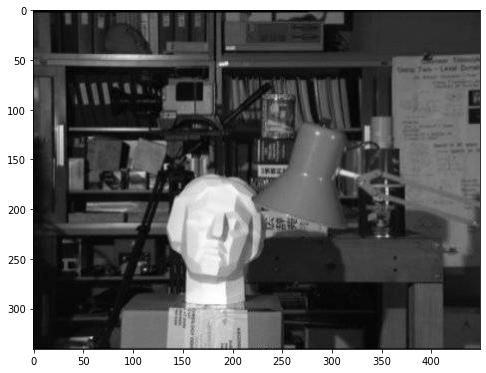

In [14]:
img = cv2.imread('images/statue_bright.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')
plt.show()

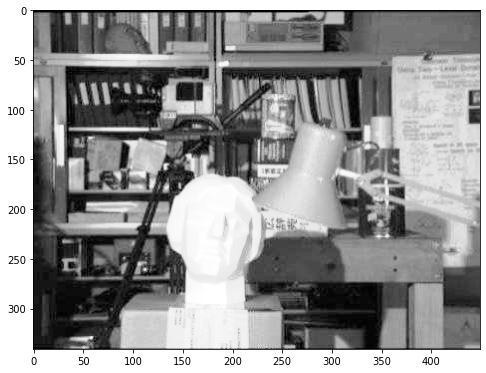

In [15]:
img = cv2.imread('images/statue_bright.jpg', cv2.IMREAD_GRAYSCALE)
equ = cv2.equalizeHist(img)
plt.figure(figsize=(8,8))
plt.imshow(equ, cmap='gray')
plt.show()

### CLAHE (Contrast Limited Adaptive Histogram Equalization)

Để giải quyết trường hợp này, ta cần dùng một phương pháp Histogram Equalization đặc biệt. Ảnh sẽ được chia thành các khối viên gạch "tiles" nhỏ (tileSize default của OpenCV là 8x8). Sau đó mỗi khối này được Equalize Histogram riêng. Nhờ đó histogram sẽ chỉ giới hạn trong một vùng nhỏ. 

Thư viện OpenCV cung cấp hàm:
- cv2.createCLAHE() - https://docs.opencv.org/4.5.2/d6/dc7/group__imgproc__hist.html#gad689d2607b7b3889453804f414ab1018
- CLAHE clipLimit: https://stackoverflow.com/questions/64576472/what-does-clip-limit-mean-exactly-in-opencv-clahe

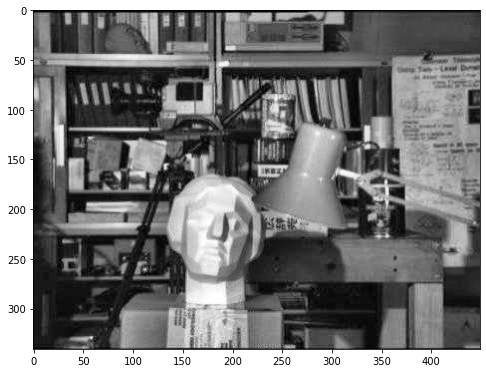

In [2]:
img = cv2.imread('images/statue_bright.jpg', cv2.IMREAD_GRAYSCALE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img = clahe.apply(img)
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')
plt.show()

## Một số phép biến đổi Histogram theo từng pixel

### Square transfrom

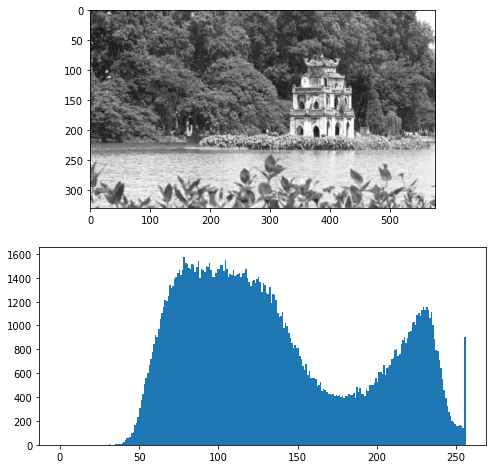

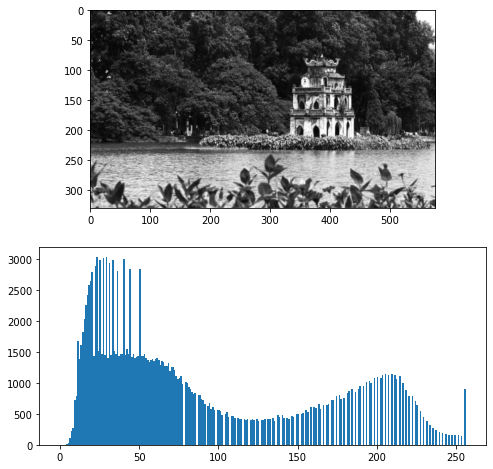

In [10]:
img = cv2.imread('images/HoGuom.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(8,8))
plt.subplot(211)
plt.imshow(img, cmap='gray')

plt.subplot(212)
plt.hist(img.ravel(),256,[0,256])
plt.show()

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img[i][j] = int(np.square(int(img[i][j]))/255)

plt.figure(figsize=(8,8))
plt.subplot(211)
plt.imshow(img, cmap='gray')

plt.subplot(212)
plt.hist(img.ravel(),256,[0,256])
plt.show()

### Square root transfrom

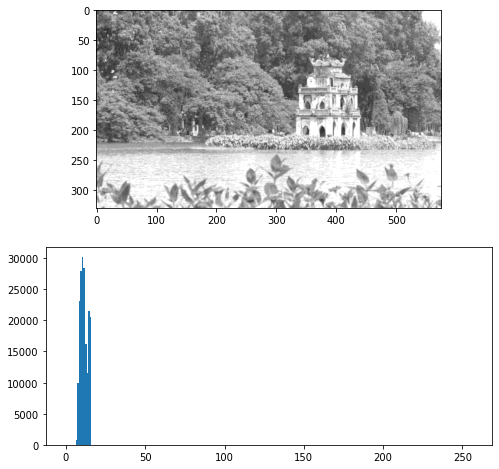

In [15]:
img = cv2.imread('images/HoGuom.jpg', cv2.IMREAD_GRAYSCALE)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img[i][j] = int(np.sqrt(int(img[i][j])))
        
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.imshow(img, cmap='gray')

plt.subplot(212)
plt.hist(img.ravel(),256,[0,256])
plt.show()

## Các phép biến đổi pixel tổng quát

### Image Addition

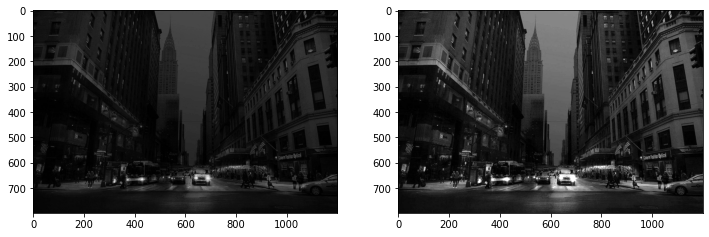

In [16]:
img = cv2.imread('images/dark.jpg', 0)

# Chuyển sang float để tránh tràn số
img_float = np.array(img, np.float16)
img_add = img + img_float

# Chuyển về uint8 để hiển thị
img_add = np.clip(img_add, 0, 255)
img_add = np.array(img_add, np.uint8)

# Show the image
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.imshow(img_add, cmap='gray')
plt.show()

### Log Transformation

$$s = c*log(1+r)$$
$$c = \frac{255}{log(1 + MaxInputPixelValue)}$$

Tài liệu tham khảo: https://theailearner.com/2019/01/01/log-transformation/

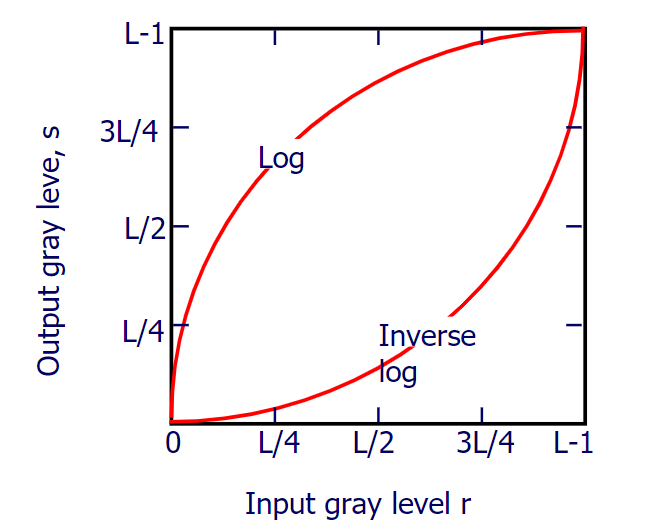

In [17]:
Image('images/log.png')

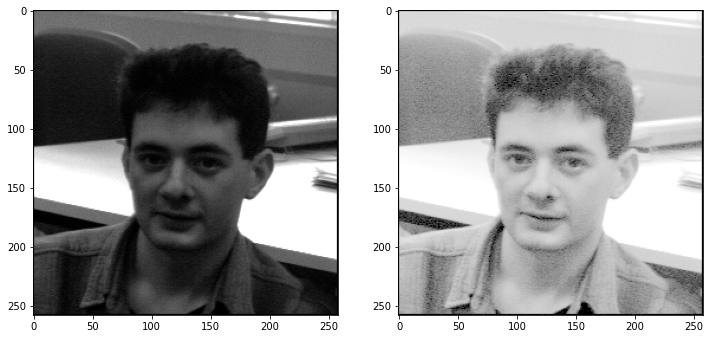

In [11]:
# Read an image
image = cv2.imread('images/log_img.jpg', 0)
   
# Apply log transformation method
image = np.array(image, dtype = np.float64)
c = 255 / np.log(1 + np.max(image))
log_image = c * (np.log(image + 1))
   
# Specify the data type so that float value will be converted to int
log_image = np.array(log_image, dtype = np.uint8)
   
# Show the images
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image, cmap='gray')

plt.subplot(122)
plt.imshow(log_image, cmap='gray')
plt.show()

### Gamma Correction

\begin{align}{O = \left( \frac{I}{255} \right)^{\gamma} \times 255}
\end{align}

Với γ<1, các cùng ảnh ban đầu bị tối sẽ được tăng sáng và histogram sẽ có xu hướng dịch chuyển sang phải, ngược lại với γ>1, ảnh sẽ được giảm sáng.

gamma_correction(image, gamma=gamma)

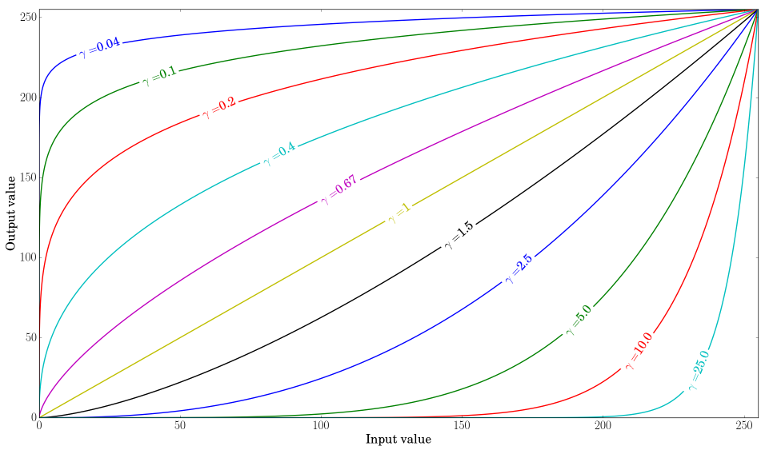

In [19]:
Image('images/Gamma_Correction.png')

In [5]:
def gamma_correction(img, gamma):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i][j] = ((int(img[i][j])/255.0) ** gamma)*255
    return img

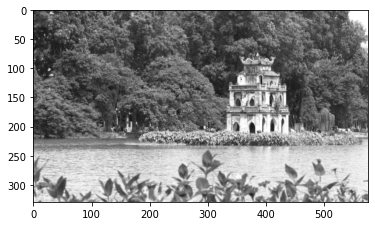

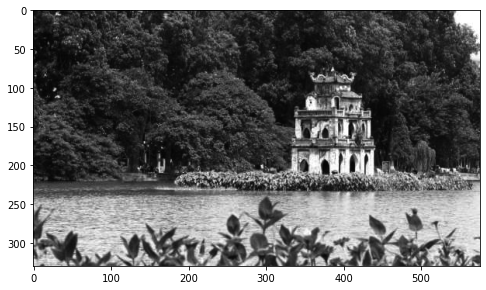

In [15]:
img = cv2.imread('images/HoGuom.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()
img = gamma_correction(img, 2)
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')
plt.show()

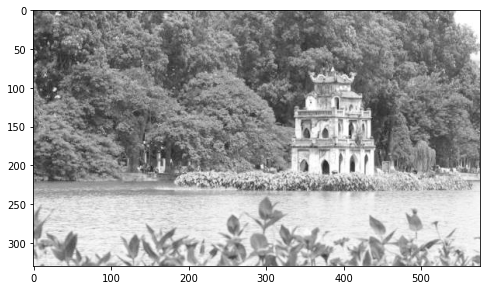

In [14]:
img = cv2.imread('images/HoGuom.jpg', cv2.IMREAD_GRAYSCALE)
img = gamma_correction(img, 0.5)
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')
plt.show()

## II. Image Filtering, Convolutions and Cross-correlations

cv2.filter2D - https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04

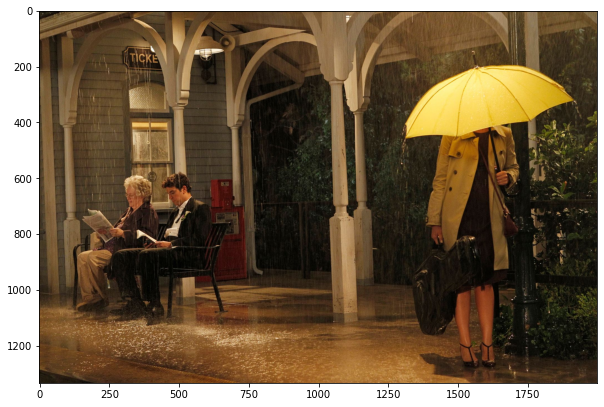

In [16]:
img = cv2.imread('images/himym.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

### Averaging kernel - Kernel lấy trung bình các điểm ảnh xung quanh

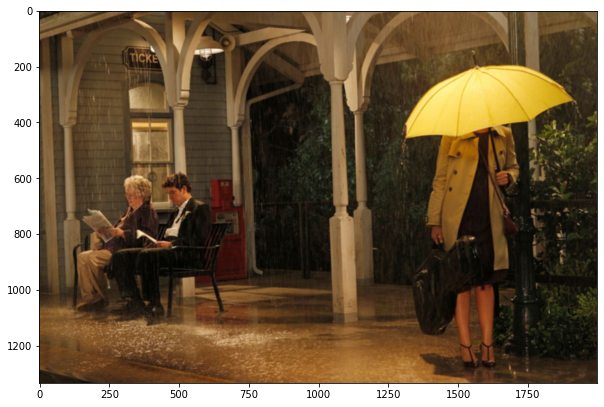

In [24]:
img = cv2.imread('images/himym.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
kernel = np.ones((5,5),np.float32)/25
img = cv2.filter2D(img, -1, kernel)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

### Sharpening kernel - Kernel tăng độ nét của ảnh

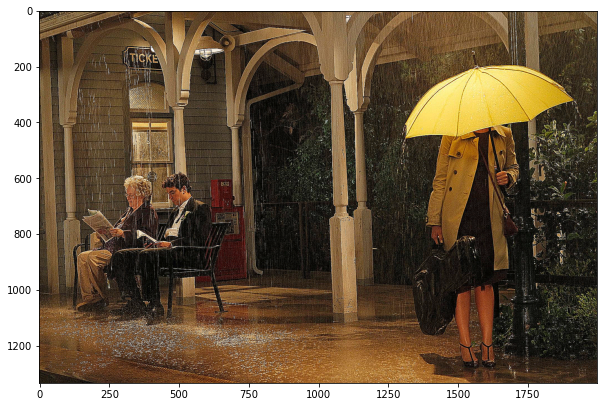

In [17]:
img = cv2.imread('images/himym.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel_sharpening)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

### Blur, GaussiannBlur, medianBlur,...

Một số kernel đặc biệt dùng để làm mịn ảnh.

- cv2.blur: https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37
- cv2.GaussianBlur: https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1
- cv2.medianBlur: https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9

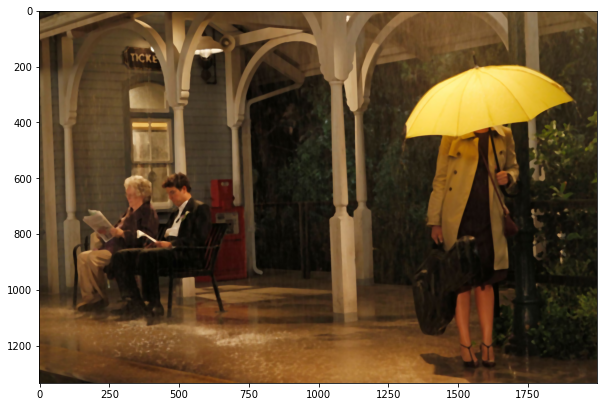

In [26]:
img = cv2.imread('images/himym.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# img = cv2.blur(img, (7, 7), 0)
# img = cv2.GaussianBlur(img, (9, 9), 0)
img = cv2.medianBlur(img, 9)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

# Bài tập thực hành

Khử nhiễu và tăng chất lượng ảnh ở các bài tập sau

## Bài tập 1: Noise Reduction

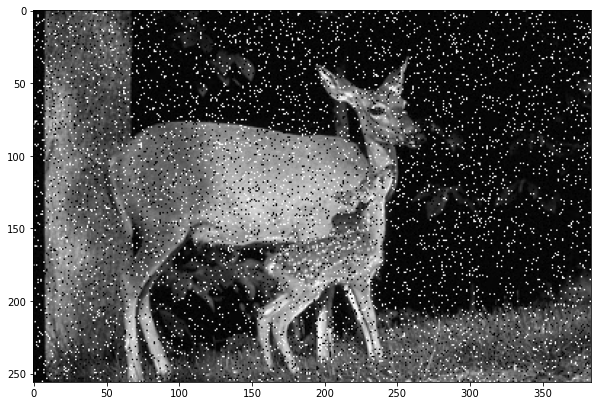

In [18]:
img = cv2.imread('images/deer_salt.jpg',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')
plt.show()

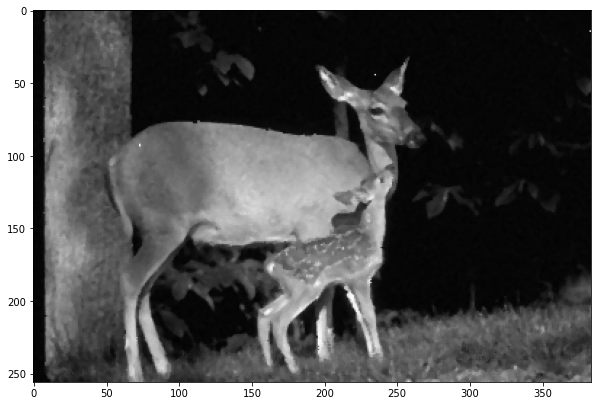

In [21]:
img = cv2.imread('images/deer_salt.jpg', cv2.IMREAD_GRAYSCALE)

### YOUR CODE HERE ###

# img = cv2.blur(img, (5,5), 0)
# img = cv2.GaussianBlur(img, (5,5), 0)
img = cv2.medianBlur(img, 3)

# kernel_sharpening = np.array([[-1,-1,-1], 
#                               [-1, 9,-1],
#                               [-1,-1,-1]])
# img = cv2.filter2D(img, -1, kernel_sharpening)

### YOUR CODE HERE ###

plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')
plt.show()

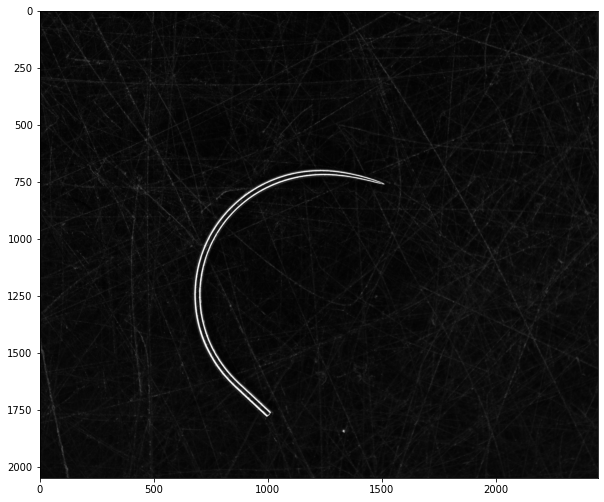

In [22]:
img = cv2.imread('images/needle1.png',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')
plt.show()

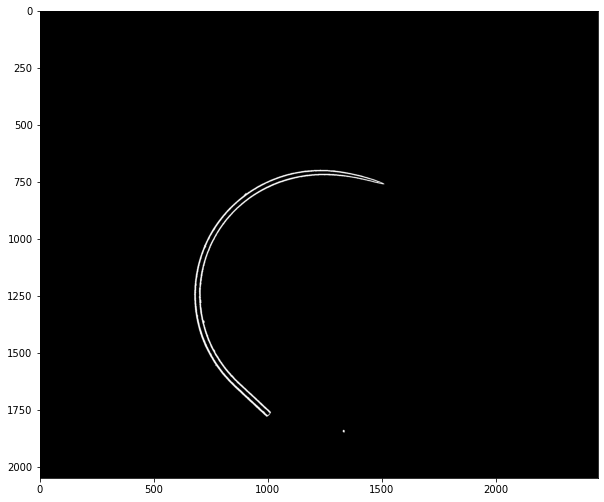

In [25]:
img = cv2.imread('images/needle1.png', cv2.IMREAD_GRAYSCALE)

### YOUR CODE HERE ###
img = cv2.medianBlur(img, 3)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j] < 100:
            img[i][j] = 0
        else:
            img[i][j] = 255
### YOUR CODE HERE ###
            
plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')
plt.show()

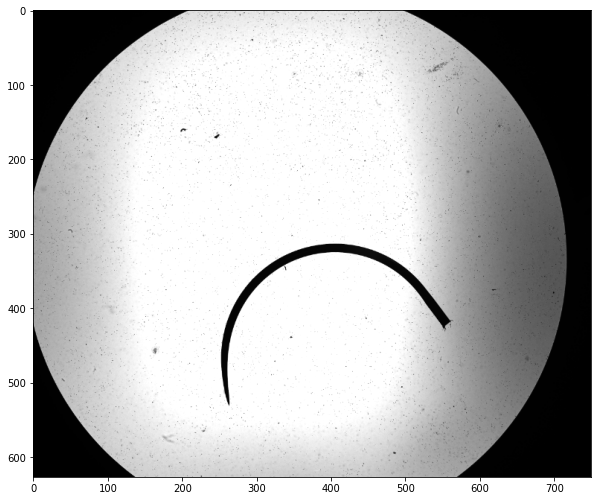

In [31]:
img = cv2.imread('images/needle2.png',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')
plt.show()

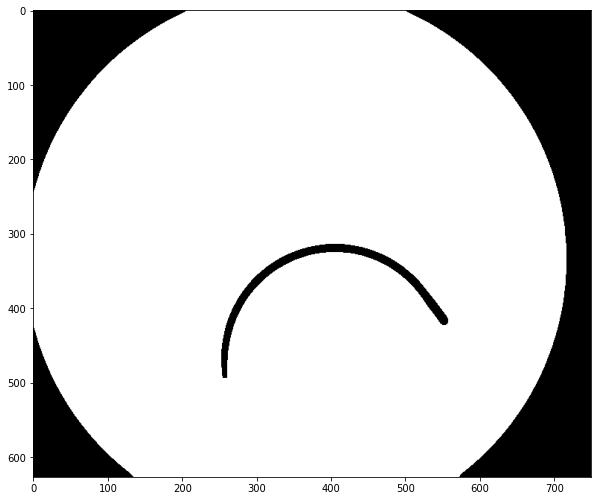

In [27]:
img = cv2.imread('images/needle2.png', 0)

### YOUR CODE HERE ###
img = cv2.medianBlur(img, 13)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j] > 60:
            img[i][j] = 255
        else:
            img[i][j] = 0

### YOUR CODE HERE ###

plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')
plt.show()

## Bài tập 2: Image Enhancement
### 1. Moon

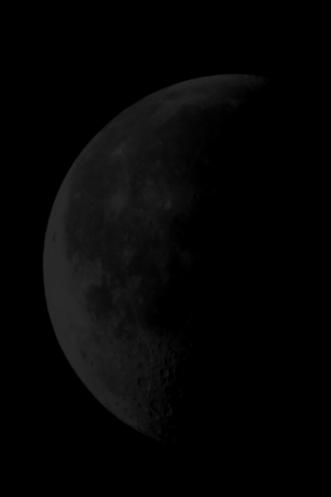

In [2]:
Image('images/moon_dark.jpg')

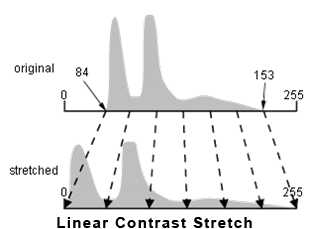

In [34]:
Image('images/linear-stretch.png')

Yêu cầu: Xây dựng hàm linear_stretch
- Xác định giá trị điểm ảnh lớn nhất (d), nhỏ nhất (c) của ảnh đầu vào
- Xác định giá trị lớn nhất (b), nhỏ nhất (a) của ảnh đầu ra (với ảnh 8 bit thì a=0 và b=255)
- Giá trị điểm ảnh mới được tính theo công thức:
$$image[i, j] = \frac{b-a}{d-c} * (image[i, j] - c) + a$$

In [3]:
def linear_stretch(image):
    """Create a full contrast stretch of the image
    takes as input:
    image: the image that need to be stretched
    return an image with full contrast stretch
    -----------------------------------------------------
    1. Full contrast stretch (fsimage)
    2. take negative (255 - fsimage)
    """
    ### YOUR CODE HERE
    a = 0
    b = 255
    c = np.min(image)
    d = np.max(image)
    rows, columns = np.shape(image)
    image1 = np.zeros((rows, columns), dtype=int)
    for i in range(rows):
        for j in range(columns):
            if (d-c) == 0:
                image1[i, j] = ((b - a) / 0.000001) * (image[i, j] - c) + a
            else:
                image1[i, j] = ((b - a) / (d - c)) * (image[i, j] - c) + a

    return np.uint8(image1)
    ### YOUR CODE HERE

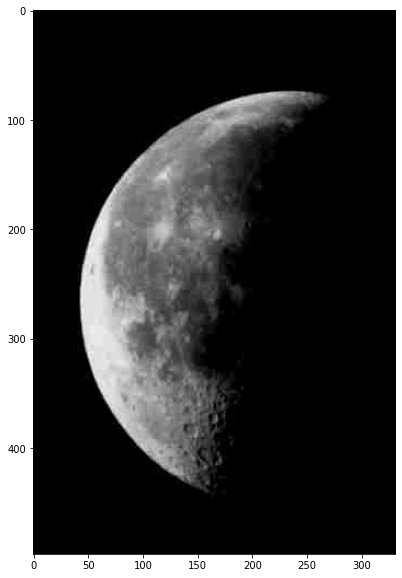

In [8]:
img = cv2.imread('images/moon_dark.jpg', cv2.IMREAD_GRAYSCALE)

### YOUR CODE HERE ###
# img = gamma_correction(img, 0.6)
# img = cv2.convertScaleAbs(img, 1.1, 5)
img = linear_stretch(img)

### YOUR CODE HERE ###

plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')
plt.show()

### 2. Balloon

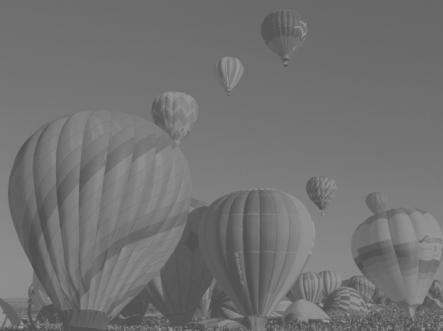

In [37]:
Image('images/balloon.jpg')

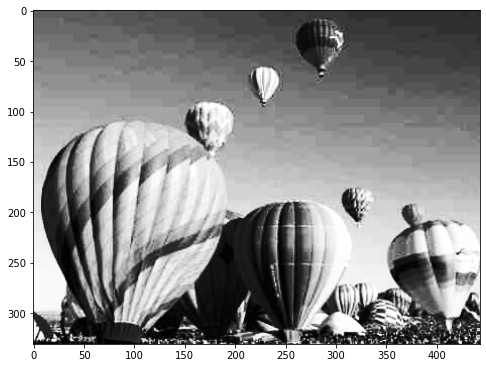

In [38]:
img = cv2.imread('images/balloon.jpg', cv2.IMREAD_GRAYSCALE)

### YOUR CODE HERE ###
img = cv2.equalizeHist(img)
# clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
# img = clahe.apply(img)
### YOUR CODE HERE ###

plt.figure(figsize=(8,8))
plt.imshow(img,cmap='gray')
plt.show()

### 3. Girl

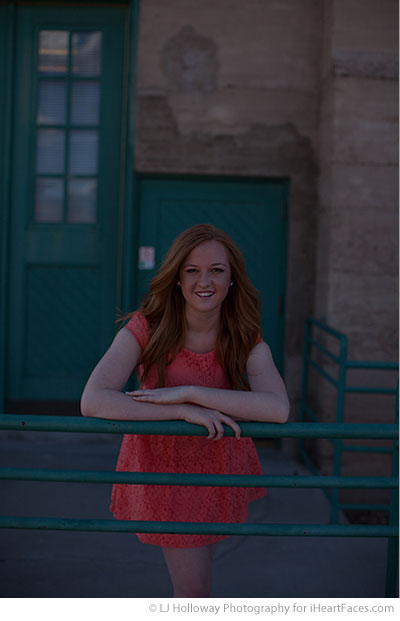

In [39]:
Image('images/girl1_dark.jpg')

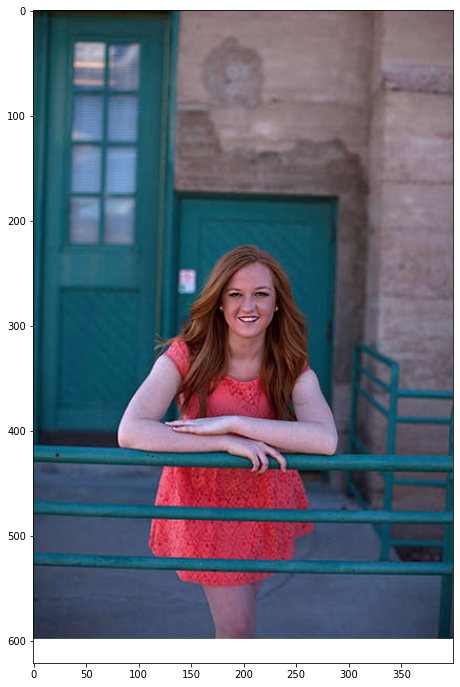

In [52]:
img = cv2.imread('images/girl1_dark.jpg')

### YOUR CODE HERE ###

img = cv2.convertScaleAbs(img, 1.3, 2)

### YOUR CODE HERE ###

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,12))
plt.imshow(img,cmap='gray')
plt.show()